# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Datset

In [17]:
df=pd.read_csv("amazon_alexa.tsv",sep="\t")
df.head(3)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1


# Data Preprocessing
- Shape of data
- Check Columns
- Check Datatypes
- Check Null Values
- Check Duplicates
- Check Unique Values
- Statistical Summary
- Info

In [18]:
df.shape

(3150, 5)

# Conclussion
- Data contain `3150` row and `5` columns

# Columns

In [19]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

- `Rating` It show that rating of eaach item
- `Date` It show the date of rating.
- `Variation` It show the product name.
- `verified_reviews` It Show the review of each category.
- `Feedback` It show the feedback of each review it should be either `Positive` and either `Negative`

# Datatypes

In [20]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

**`Date` Column should be in object form convert this into `datetime`**

In [21]:
df['date']=pd.to_datetime(df['date'])

In [22]:
df.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            object
feedback                     int64
dtype: object

# Null Values

In [23]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [24]:
df.isnull().mean()

rating              0.000000
date                0.000000
variation           0.000000
verified_reviews    0.000317
feedback            0.000000
dtype: float64

**There is only 1 null values so we can drop this value**

In [25]:
df[df['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,2018-06-29,White,NaN,0


In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

# Duplicates

In [28]:
df.duplicated().sum()

715

In [30]:
df[df.duplicated()]

,rating,date,variation,verified_reviews,feedback
700,5,2018-07-31,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
701,3,2018-07-31,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
702,5,2018-07-31,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
703,5,2018-07-30,Heather Gray Fabric,looks great,1
704,5,2018-07-30,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1


# Conclussion
- It show the `715` duplicates values but after checking there is no duplicates here**

# Unique Values

In [34]:
 for i in df.select_dtypes('object').columns:
    print(f"Unique values in {i}")
    print(f"{df[i].unique()}")
    print(f"Total Unique Values are: {df[i].nunique()}")
    print("-"*50)
    print()

Unique values in variation
['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 'Sandstone Fabric ' 'Oak Finish ' 'Black' 'White' 'Black  Spot'
 'White  Spot' 'Black  Show' 'White  Show' 'Black  Plus' 'White  Plus'
 'Configuration: Fire TV Stick' 'Black  Dot' 'White  Dot']
Total Unique Values are: 16
--------------------------------------------------

Unique values in verified_reviews
['Love my Echo!' 'Loved it!'
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'
 ...
 "Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some large

# Statistical Summary

In [35]:
df.describe()

,rating,date,feedback
count,3149.000000,3149,3149.000000
mean,4.463957,2018-07-24 02:50:34.106065664,0.918704
min,1.000000,2018-05-16 00:00:00,0.000000
25%,4.000000,2018-07-28 00:00:00,1.000000
50%,5.000000,2018-07-30 00:00:00,1.000000
75%,5.000000,2018-07-30 00:00:00,1.000000
max,5.000000,2018-07-31 00:00:00,1.000000
std,1.067773,NaN,0.273332


# Info

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3149 non-null   int64         
 1   date              3149 non-null   datetime64[ns]
 2   variation         3149 non-null   object        
 3   verified_reviews  3149 non-null   object        
 4   feedback          3149 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 147.6+ KB


# Exploratory Data Analysis

In [41]:
df.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1


### Rating

In [42]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

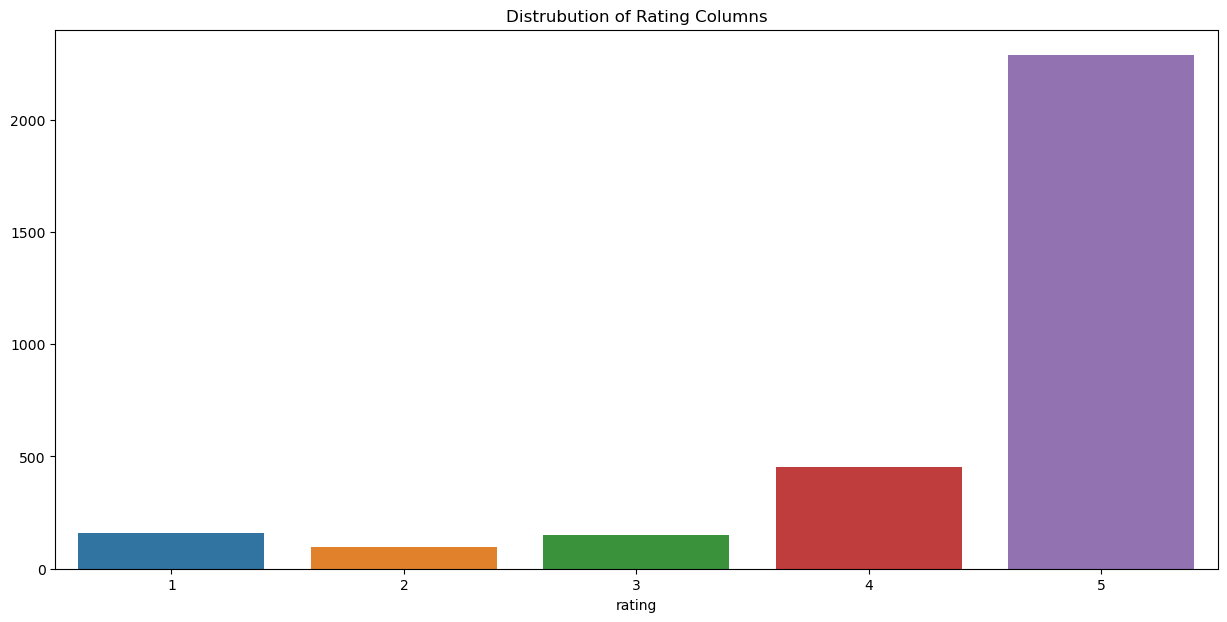

In [44]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Rating Columns")
sns.barplot(x=df['rating'].value_counts().index,y=df['rating'].value_counts().values)
plt.show()

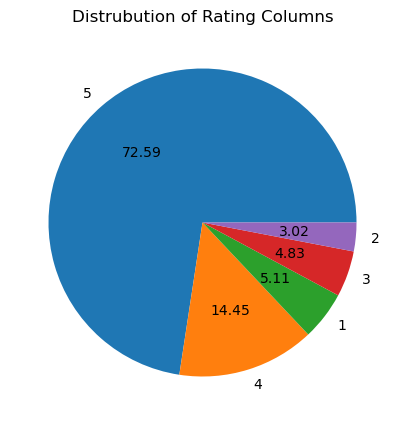

In [48]:
plt.figure(figsize=(10,5))
plt.title("Distrubution of Rating Columns")
plt.pie(df['rating'].value_counts().values,labels=df['rating'].value_counts().index,autopct="%.2f")
plt.show()

# Conclussion
- We can see that `72%` rating are 5.
- We can see that `14%` rating are 4.
- We can see that `4%` rating are 3.
- We can see that `3%` rating are 2.
- We can see that `5%` rating are 1.

In [49]:
df.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1


# Feedback

In [51]:
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

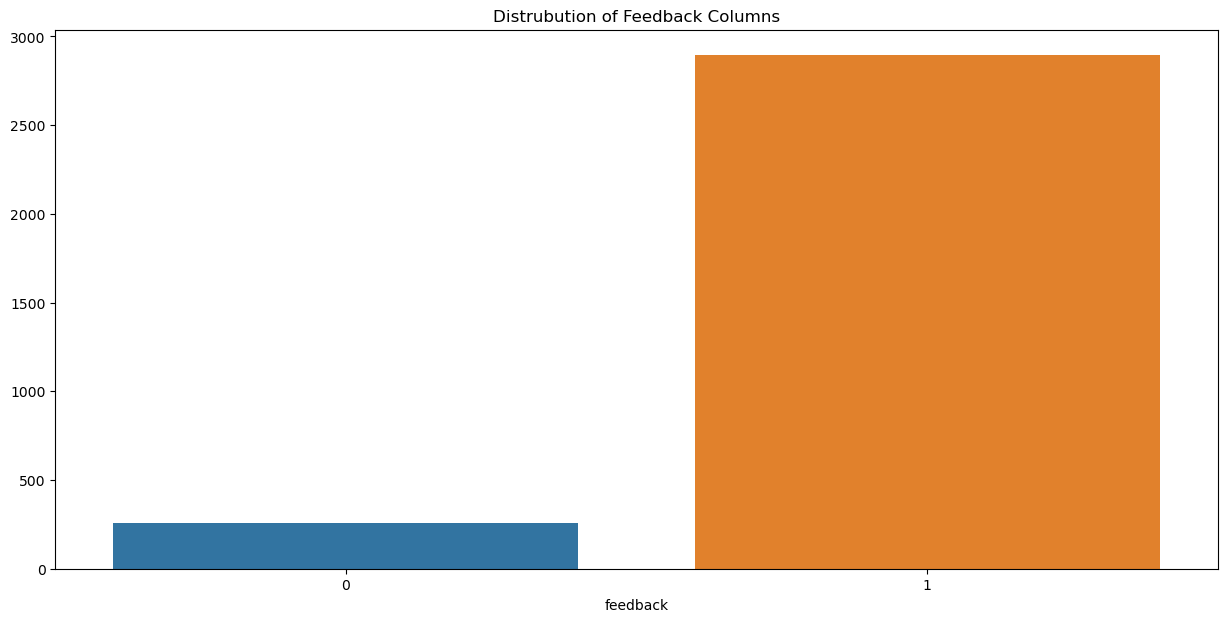

In [50]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Feedback Columns")
sns.barplot(x=df['feedback'].value_counts().index,y=df['feedback'].value_counts().values)
plt.show()

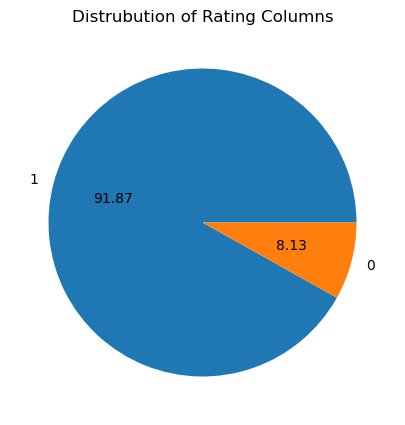

In [52]:
plt.figure(figsize=(10,5))
plt.title("Distrubution of Rating Columns")
plt.pie(df['feedback'].value_counts().values,labels=df['feedback'].value_counts().index,autopct="%.2f")
plt.show()

# Conclussion
- we can see that data should be imbalance `91%` feedback is 1 and `8%` are 0.
- Now check what is `0` and what is `1`

In [62]:
df[df['feedback']==0].iloc[101]['verified_reviews']

'I own 3 of these...  amazon is ignoring its customers and using these devices as a marketing tool.  You can customize the screen contents, but you cannot turn off there advertising, Things to Try...  People will suggest that you can, but you can only do so if you turn off all content changes which is not an acceptable option.Moreover, they should increase the size slightly, and improve the audio speaker.  That would give you a 5 star device.Right now i’m debating whether to return all 3 devices.  My wife says we should.'

In [63]:
df[df['feedback']==1].iloc[101]['verified_reviews']

'awesome thing, love Alexa'

# Conclussion
- After some analysis i can see that `0 Feedback` show that `feedback` is `negative`.
- `1 Feedback` show that `feedback` is `positive`

In [125]:
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

# variation

In [70]:
df.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1


In [71]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

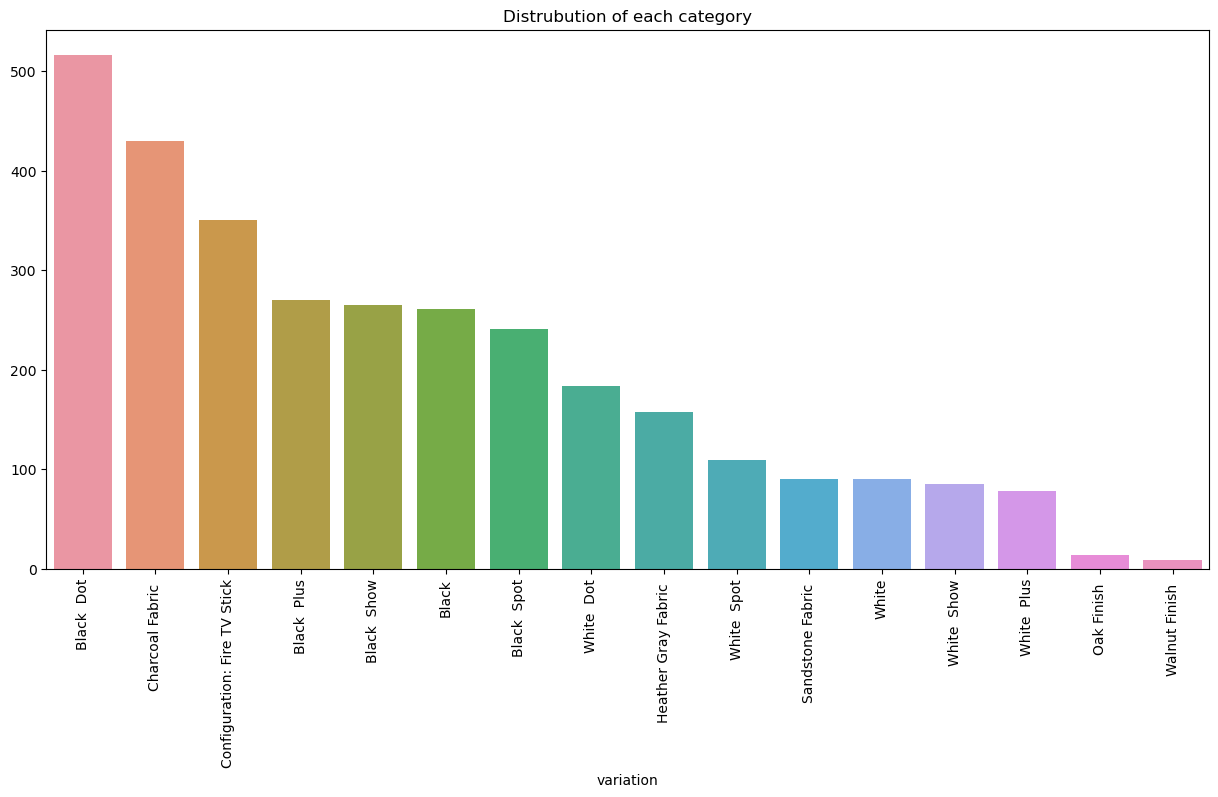

In [73]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of each category")
sns.barplot(x=df['variation'].value_counts().index,y=df['variation'].value_counts().values)
plt.xticks(rotation='vertical')
plt.show()

# Conclussion
- We can see that `Black Dot` is sale more then others.
- we can alsoe see thta `Walnut` is sell less then others.

In [74]:
df.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1


# Now we can check the distrubution of positive and negative reviews

In [76]:
df['review_length']=df['verified_reviews'].apply(lambda x:len(x))

In [77]:
df.head(2)

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9


In [108]:
neg_review=df[df['feedback']==0]
pos_review=df[df['feedback']==1]

In [83]:
neg_review.head(1)

,rating,date,variation,verified_reviews,feedback,review_length
46,2,2018-07-30,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163


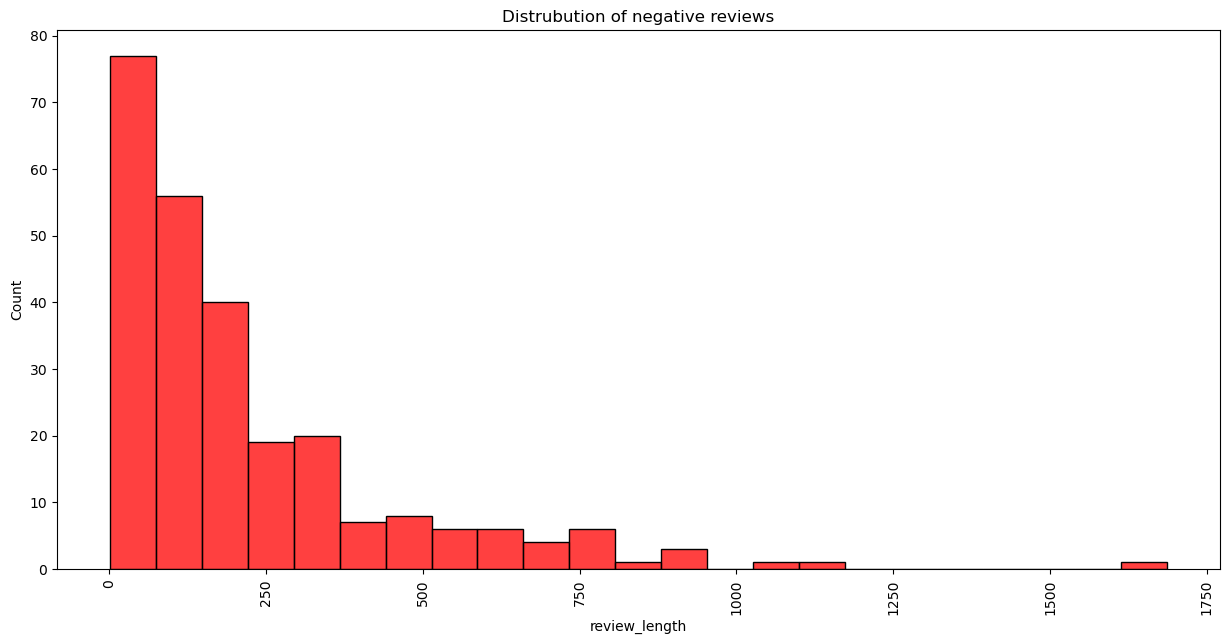

In [86]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of negative reviews")
sns.histplot(neg_review['review_length'],color='red')
plt.xticks(rotation='vertical')
plt.show()

# Conclussion
- We can see that for negative context length of word is high.

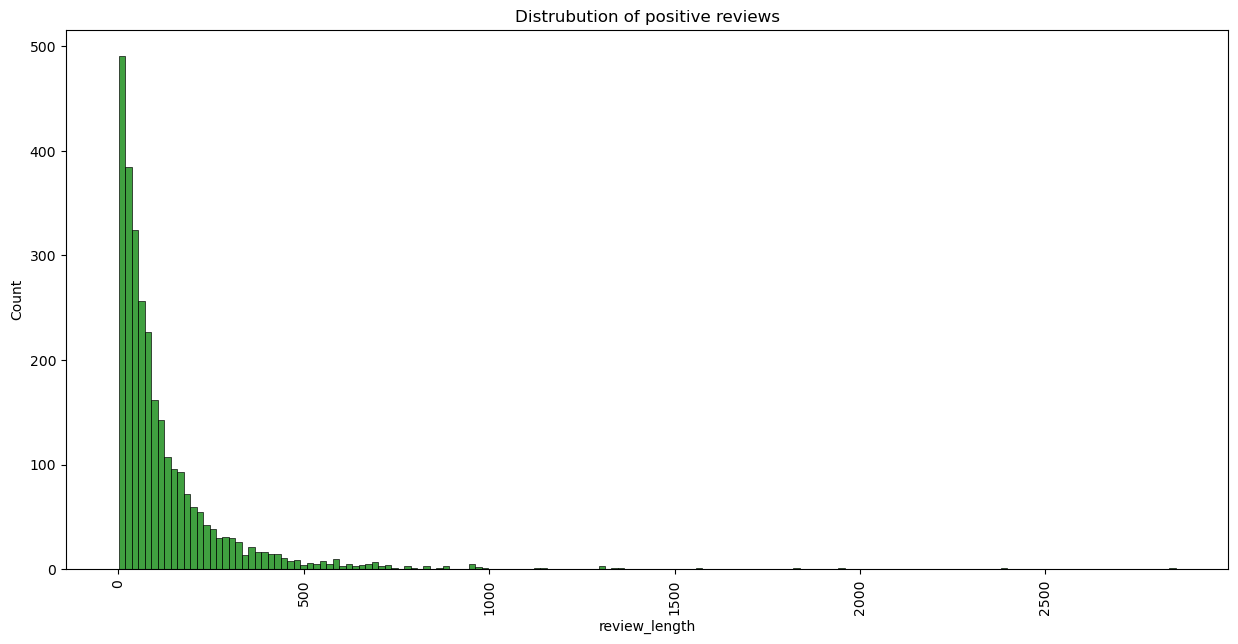

In [87]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of positive reviews")
sns.histplot(pos_review['review_length'],color='green')
plt.xticks(rotation='vertical')
plt.show()

# Conclussion
- Similarly we see that for positive context there is also len of word is high.

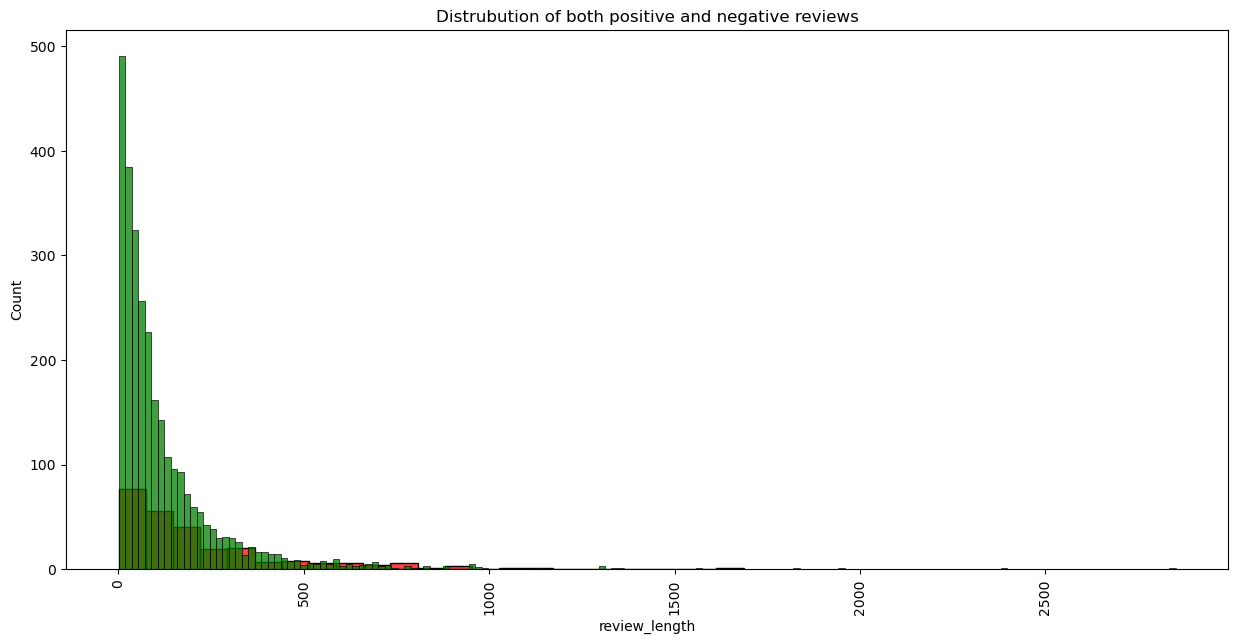

In [88]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of both positive and negative reviews")
sns.histplot(neg_review['review_length'],color='red')
sns.histplot(pos_review['review_length'],color='green')
plt.xticks(rotation='vertical')
plt.show()

# Now check those categories where review is positive

In [89]:
df.head(1)

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13


### Distrubution of `negative review` category

In [91]:
neg_review['variation'].value_counts()

variation
Black  Dot                      36
Black                           35
Black  Spot                     32
Black  Plus                     28
Configuration: Fire TV Stick    28
Black  Show                     18
White                           16
Charcoal Fabric                 12
White  Spot                     12
White  Dot                      12
White  Show                     11
White  Plus                      8
Sandstone Fabric                 6
Heather Gray Fabric              2
Name: count, dtype: int64

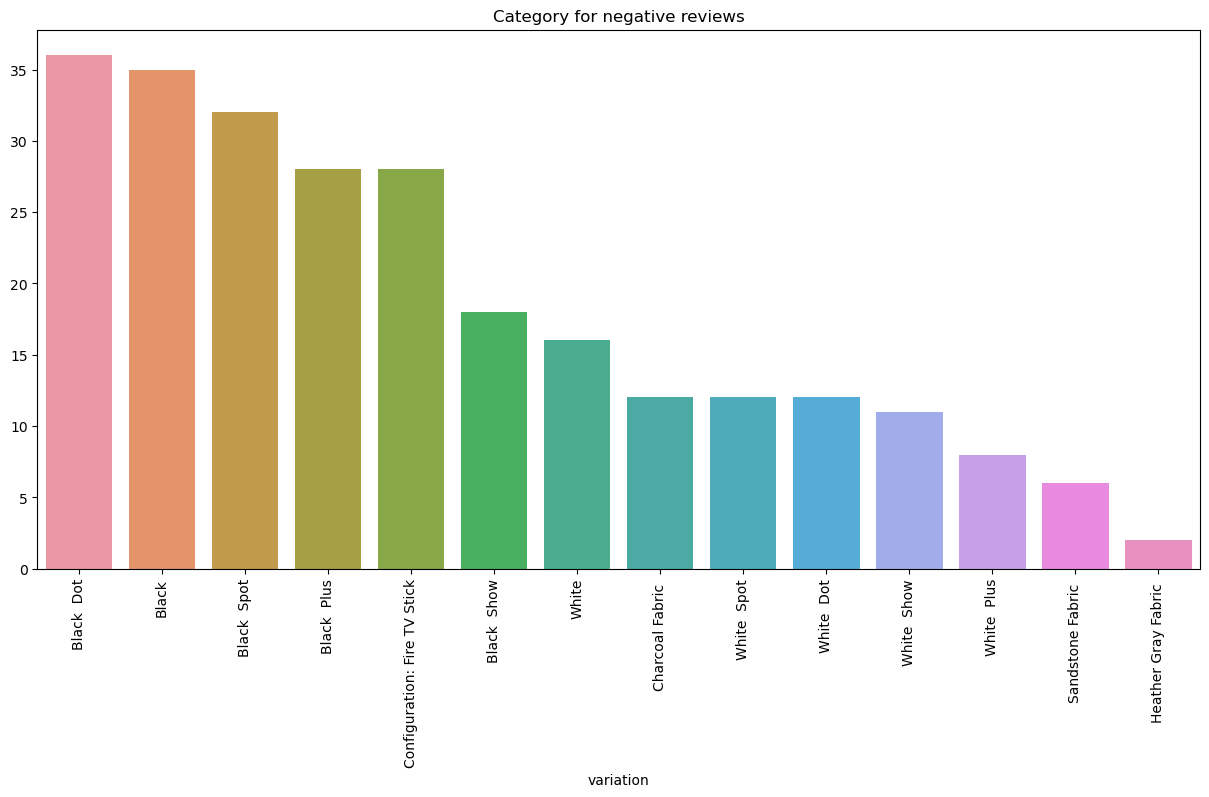

In [92]:
plt.figure(figsize=(15,7))
plt.title("Category for negative reviews")
sns.barplot(x=neg_review['variation'].value_counts().index,y=neg_review['variation'].value_counts().values)
plt.xticks(rotation='vertical')
plt.show()

# Conclussion
- we see that most complain occur in  `balck dot` category.

### Distrubution of `positive review` category

In [93]:
pos_review['variation'].value_counts()

variation
Black  Dot                      480
Charcoal Fabric                 418
Configuration: Fire TV Stick    322
Black  Show                     247
Black  Plus                     242
Black                           226
Black  Spot                     209
White  Dot                      172
Heather Gray Fabric             155
White  Spot                      97
Sandstone Fabric                 84
White                            74
White  Show                      74
White  Plus                      70
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

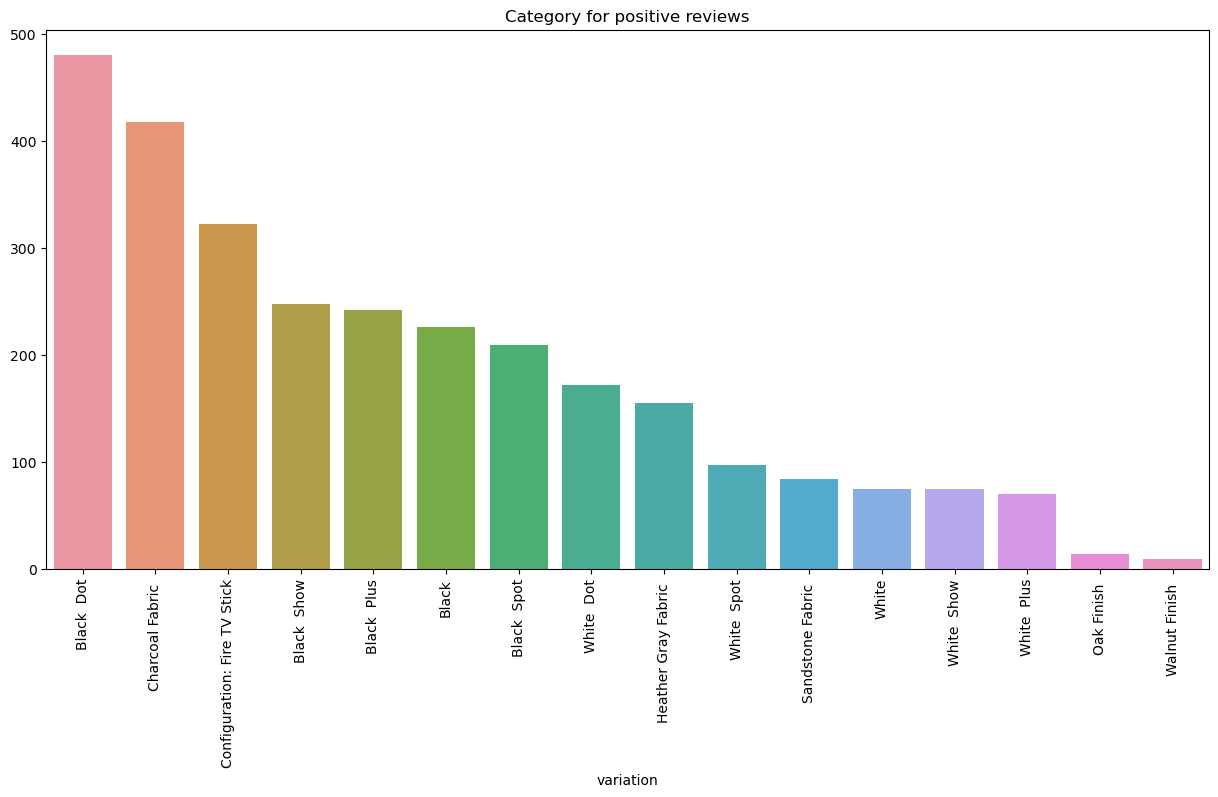

In [94]:
plt.figure(figsize=(15,7))
plt.title("Category for positive reviews")
sns.barplot(x=pos_review['variation'].value_counts().index,y=pos_review['variation'].value_counts().values)
plt.xticks(rotation='vertical')
plt.show()

# Conclussion
- we can see customer can also give `positive review` in `balck dot` category.
- So after checking both positive and negative cayegory we can reach in this solution some customer can complain in `balck dot` and some give `positive review` in `black dot`  

In [95]:
df.head(2)

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9


# Now check which date can give most review

### Negative Review Rate

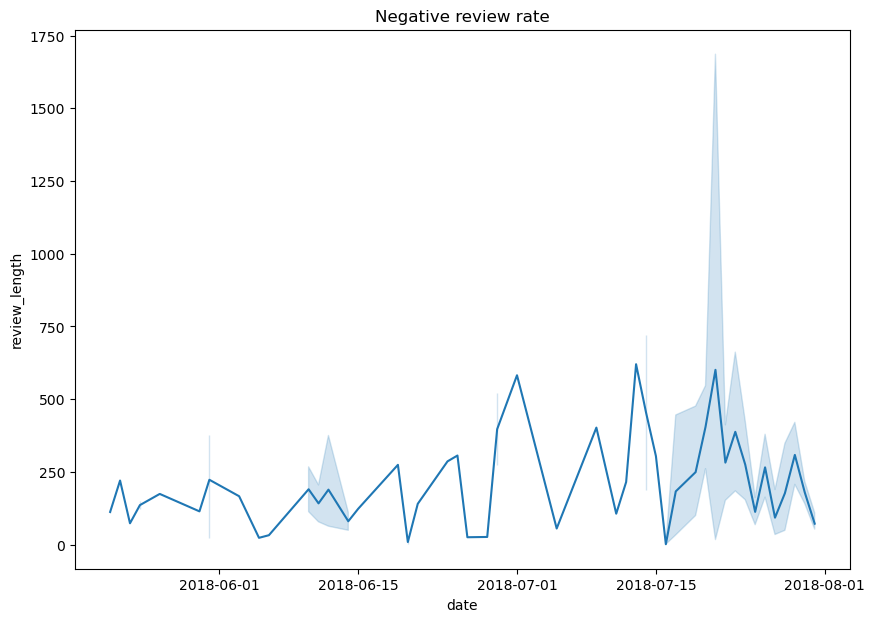

In [97]:
plt.figure(figsize=(10,7))
plt.title("Negative review rate")
sns.lineplot(x=neg_review['date'],y=neg_review['review_length'])
plt.show()

### Positive review rate 

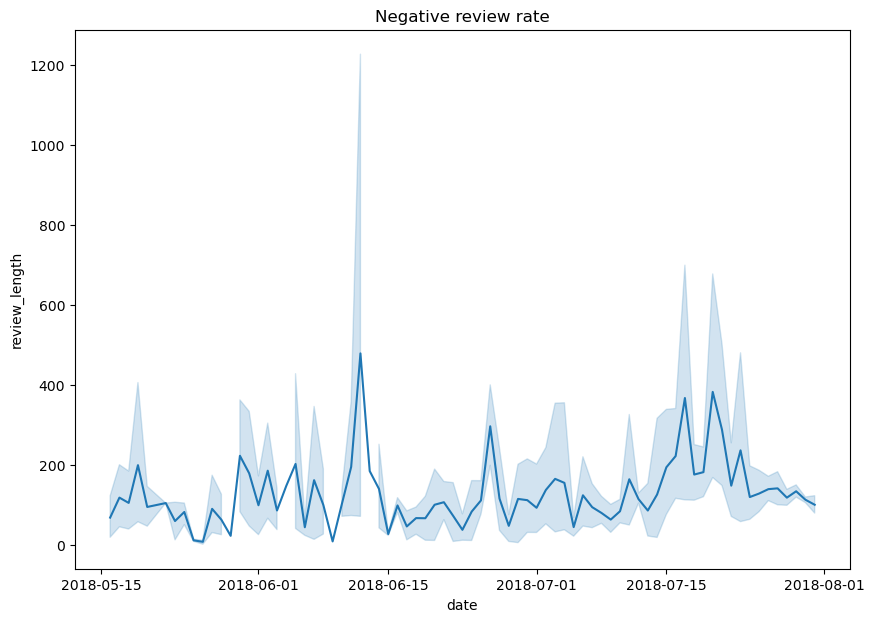

In [98]:
plt.figure(figsize=(10,7))
plt.title("Negative review rate")
sns.lineplot(x=pos_review['date'],y=pos_review['review_length'])
plt.show()

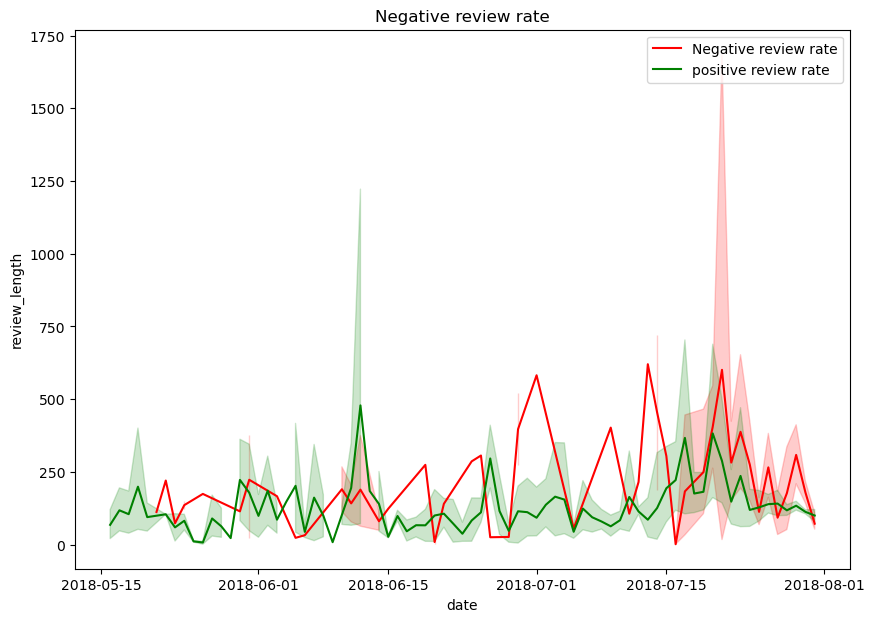

In [99]:
plt.figure(figsize=(10,7))
plt.title("Negative review rate")
sns.lineplot(x=neg_review['date'],y=neg_review['review_length'],label='Negative review rate',color='red')
sns.lineplot(x=pos_review['date'],y=pos_review['review_length'],label='positive review rate',color='green')
plt.legend()
plt.show()

# Conclussion
- we see the in certian time `positive review rate` is high and certian time `negative revew rate` is high.

In [100]:
df.head(2)

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9


# Word Cloud of `Positive review`

In [105]:
from wordcloud import WordCloud

In [113]:
neg_corpus=" ".join(neg_review['verified_reviews'].tolist())
neg_corpus

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

In [114]:
pos_corpus=" ".join(pos_review['verified_reviews'].tolist())
pos_corpus

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

# Word Cloud for `negative review`

In [119]:
neg_cloud=WordCloud(width=800,height=400, background_color='white', max_words=100,colormap='viridis').generate(neg_corpus)

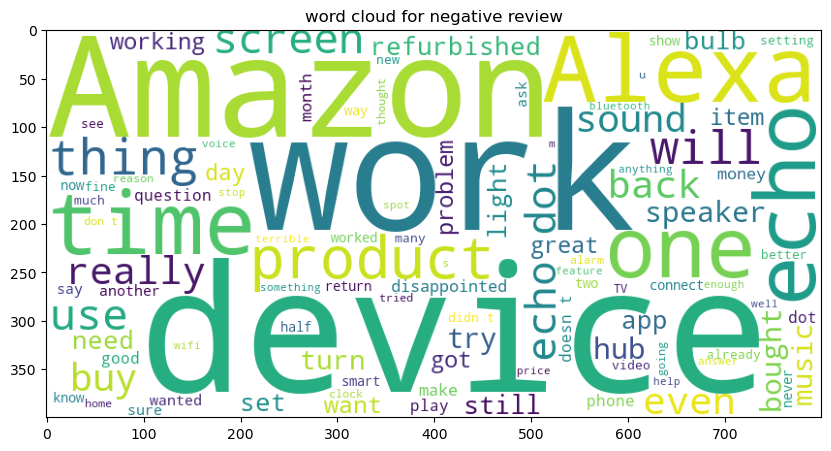

In [120]:
plt.figure(figsize=(10,7))
plt.title('word cloud for negative review')
plt.imshow(neg_cloud)
plt.show()

# Conclussion
- We can see that these are the issue in which customer can give negative review.

In [121]:
pos_cloud=WordCloud(width=800,height=400, background_color='white', max_words=100,colormap='viridis').generate(pos_corpus)

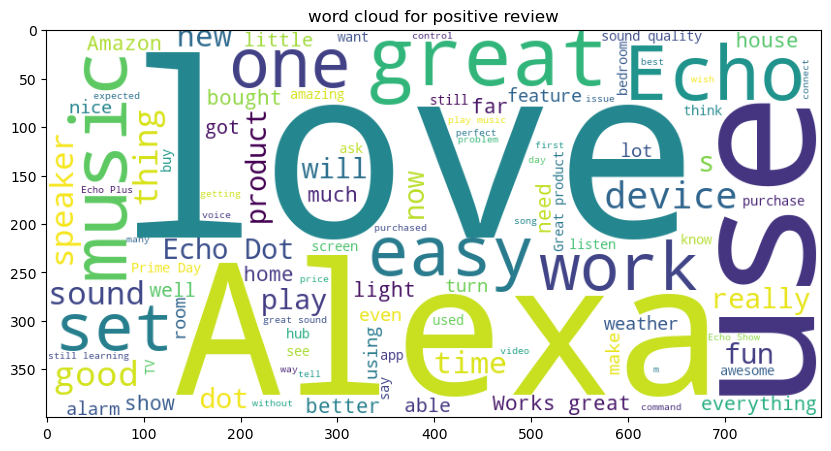

In [122]:
plt.figure(figsize=(10,7))
plt.title('word cloud for positive review')
plt.imshow(pos_cloud)
plt.show()

# Conclussion
- Now we can see that due to these reasons customer can give `positve review`.

In [123]:
df.head(2)

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
